In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

# DataSet
#### Read csv file
#### Create dataframe

In [146]:
dataset=pd.read_csv(r"C:\Datasets-base\Datasets\Power_Production_Solar_Panels\PV_Elec_Gas3.csv")
#dataset.info()
PV_DF=dataset.copy()

In [147]:
PV_DF.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3


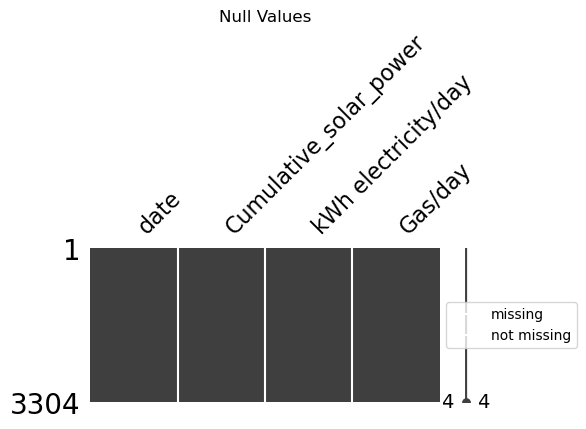

Total Null Values: 0
Total NA Values: 0
Describe:
        Cumulative_solar_power  kWh electricity/day      Gas/day
count             3304.000000          3304.000000  3304.000000
mean             17616.116435             4.585048     8.343705
std              10577.158537             9.856726     6.334102
min                  0.100000           -24.000000     0.000000
25%               8089.500000            -3.000000     2.000000
50%              17184.500000             6.000000     8.000000
75%              27116.500000            13.000000    13.000000
max              36469.000000            34.000000    29.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3304 non-null   object 
 1   Cumulative_solar_power  3304 non-null   float64
 2   kWh electricity/day     3304 non-null   float64
 3

In [148]:
import missingno as msno
def CheckNullValues(Dataset):
    Null = Dataset.isnull().sum()
    Na = Dataset.isna().sum()
    msno.matrix(Dataset.sample(Dataset.shape[0]), figsize=(5,2), sparkline=True, p=0);
    plt.legend(['missing','not missing'],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Null Values')
    plt.show()
    print('Total Null Values:', Null.sum())
    print('Total NA Values:', Na.sum())
    print("Describe:\n",Dataset.describe())
    print("Info:\n",Dataset.info())
    print("Head Dataframe:\n",Dataset.head(10))


CheckNullValues(PV_DF) 

### Processing Dtype Object 

In [149]:
PV_DF['date']= pd.to_datetime(PV_DF['date'], format='%d/%m/%Y')
PV_DF['day']= PV_DF['date'].dt.day
PV_DF['month']= PV_DF['date'].dt.month
PV_DF['year']= PV_DF['date'].dt.year

### For macro economic analysis we need the energy.
### Energy(Wh) is obtained by performing the time integral(h) of power(W)
#### Create Data Frame for energy

In [150]:
Columns=['date','KWh_Electric','KWh_Gas','KWh_Solar']
Energy_df=pd.DataFrame(columns=Columns)
Energy_df['date']=PV_DF['date']
Energy_df['KWh_Electric']=PV_DF['kWh electricity/day'].cumsum()
Energy_df['KWh_Gas'] = PV_DF['Gas/day'].cumsum()
Energy_df['KWh_Solar']=PV_DF['Cumulative_solar_power']




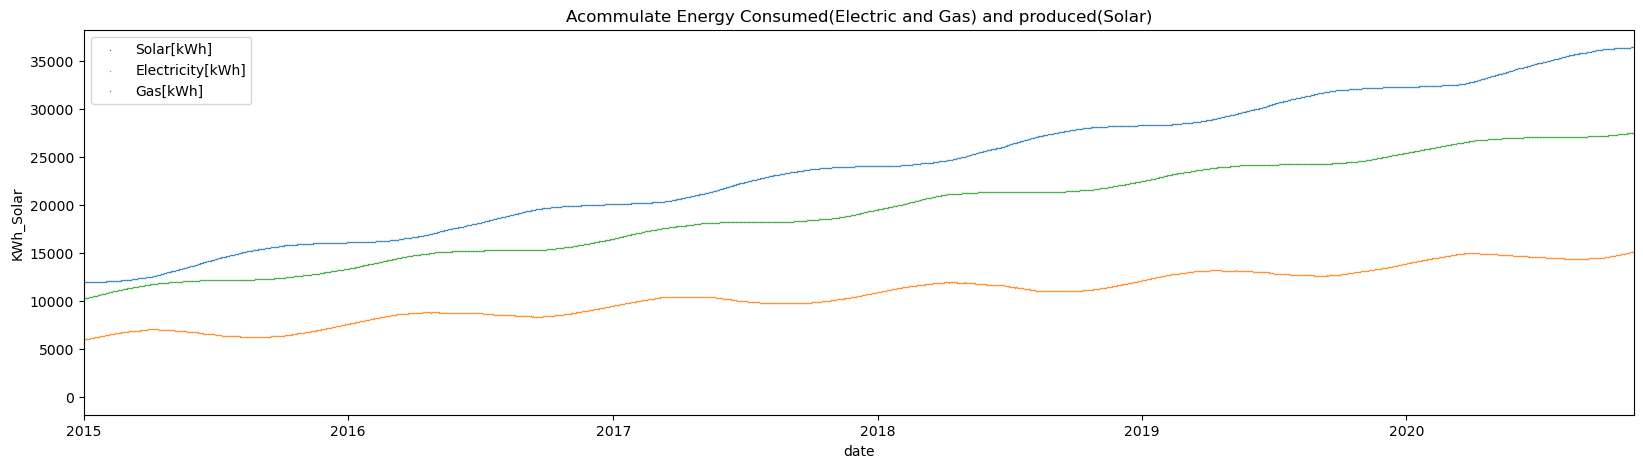

In [151]:
_, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(data=Energy_df, x="date", y="KWh_Solar", label='Solar[kWh]',s=1)
sns.scatterplot(data=Energy_df, x="date", y="KWh_Electric", label='Electricity[kWh]',s=1)
sns.scatterplot(data=Energy_df, x="date", y="KWh_Gas", label='Gas[kWh]',s=1)
plt.title('Acommulate Energy Consumed(Electric and Gas) and produced(Solar)')
ax.set_axisbelow(True)
ax.set_xlim([datetime(2015,1,1), datetime(2020,11,10)])
ax.legend()
plt.show()


### Micro analysis
#### plot daily registor for production and comsumed electricytie 

In [161]:
Columns=['date','KWh_Electric','KWh_Gas','KWh_Solar']
Energy_day_df=pd.DataFrame(columns=Columns)
Energy_day_df['date']=PV_DF['date']
Energy_day_df['KWh_Electric']=PV_DF['kWh electricity/day']
Energy_day_df['KWh_Gas'] = PV_DF['Gas/day']
Energy_day_df['KWh_Solar']= dataset['Cumulative_solar_power'].diff()
Energy_day_df.at[0,'KWh_Solar'] = dataset['Cumulative_solar_power'][0]  #because i have a nullvalue in first value
Energy_day_df['KWh_consumed']=Energy_day_df['KWh_Solar']+Energy_day_df['KWh_Electric']
Energy_day_df.head()

,date,KWh_Electric,KWh_Gas,KWh_Solar,KWh_consumed
0,2011-10-26,15.1,9.0,0.1,15.2
1,2011-10-27,7.4,9.2,10.1,17.5
2,2011-10-28,5.8,8.0,10.0,15.8
3,2011-10-29,4.9,6.6,9.4,14.3
4,2011-10-30,11.7,5.3,4.6,16.3


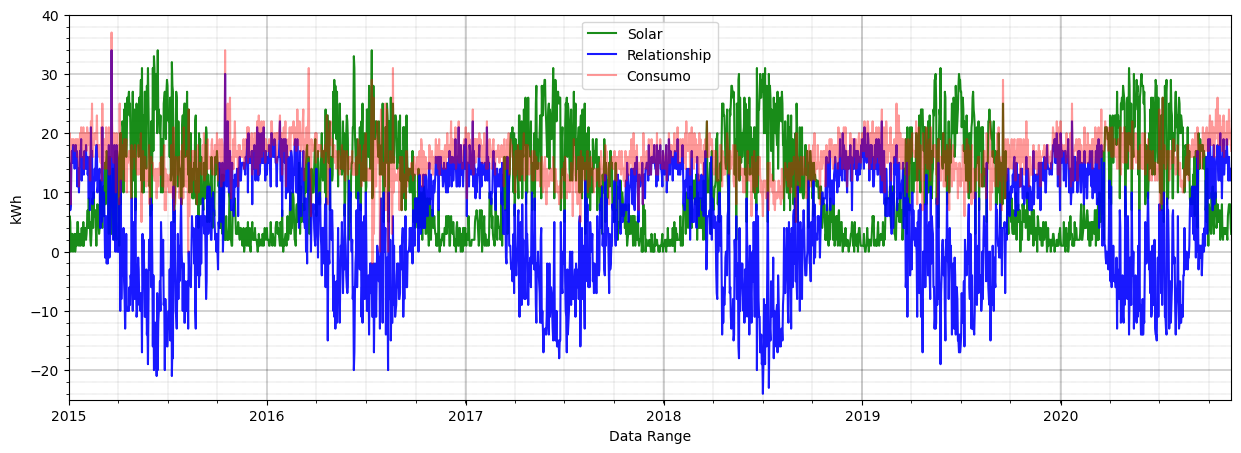

In [177]:
_, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(data=Energy_day_df, x="date", y="KWh_Solar", label='Solar', alpha=0.9,color='green')
sns.lineplot(data=Energy_day_df, x="date", y="KWh_Electric", label='Relationship',alpha=0.9,color='blue')
sns.lineplot(data=Energy_day_df, x="date", y="KWh_consumed", label='Consumo',alpha=0.4,color='red')
plt.title('  ')
plt.xlabel('Data Range'), plt.ylabel('kW')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.25, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.25, color='black', alpha=0.7)
ax.set_ylim(-25,40);

ax.set_xlim([datetime(2015,1,1), datetime(2020,11,10)]);
plt.show()
